# labeling irisses with k-means

In [1]:
from sklearn import cluster, datasets

X_iris, y_iris = datasets.load_iris(return_X_y=True)


In [2]:
X_iris.ndim

2

In [3]:
k_means = cluster.KMeans(n_clusters=3, n_init=10)
k_means.fit(X_iris)

print(k_means.labels_[::10])

print(y_iris[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


c:\Users\johan\.conda\envs\joh_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The above is a rough way to visualise the accuracy. The below is more elaborate. It gives 3 estimators. Clearly 3 clusters works best. Focus the ground truth bit: 
- `ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)`
- `ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=y, edgecolor="k")`

The estimators are unpacked in the for loop though. 

Text(0.5, 0.92, 'Ground Truth')

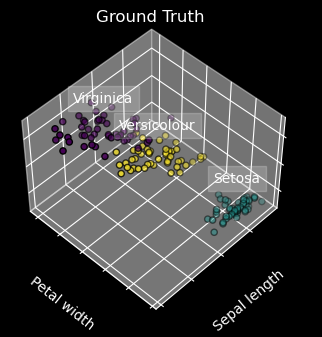

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Though the following import is not directly being used, it is required
# for 3D projection to work with matplotlib < 3.2
import mpl_toolkits.mplot3d  

np.random.seed(5)

estimators = [
    ("k_means_iris_8", KMeans(n_clusters=8, n_init="auto")),
    ("k_means_iris_3", KMeans(n_clusters=3, n_init="auto")),
    ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

fig = plt.figure(figsize=(10, 8))
# titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
# for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
#     ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
#     est.fit(X_iris)
#     labels = est.labels_

#     ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=labels.astype(float), edgecolor="k")

#     ax.xaxis.set_ticklabels([])
#     ax.yaxis.set_ticklabels([])
#     ax.zaxis.set_ticklabels([])
#     ax.set_xlabel("Petal width")
#     ax.set_ylabel("Sepal length")
#     ax.set_zlabel("Petal length")
#     ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X_iris[y_iris == label, 3].mean(),
        X_iris[y_iris == label, 0].mean(),
        X_iris[y_iris == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.2, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y_iris, [1, 2, 0]).astype(float) # just for the `c=` below

ax.scatter(X_iris[:, 3], X_iris[:, 0], X_iris[:, 2], c=y, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
# ax.set_zlabel("Petal length") 
ax.set_title("Ground Truth")

# plt.subplots_adjust(wspace=0.25, hspace=0.25)
# plt.show()

# Encoding an image with K-means

In [19]:
import numpy as np
from scipy.datasets import face
   
raccoon_face = face(gray=True)

print(f"The dimension of the image is {raccoon_face.shape}")
print(f"The data used to encode the image is of type {raccoon_face.dtype}")
print(f"The number of bytes taken in RAM is {raccoon_face.nbytes}")

The dimension of the image is (768, 1024)
The data used to encode the image is of type uint8
The number of bytes taken in RAM is 786432


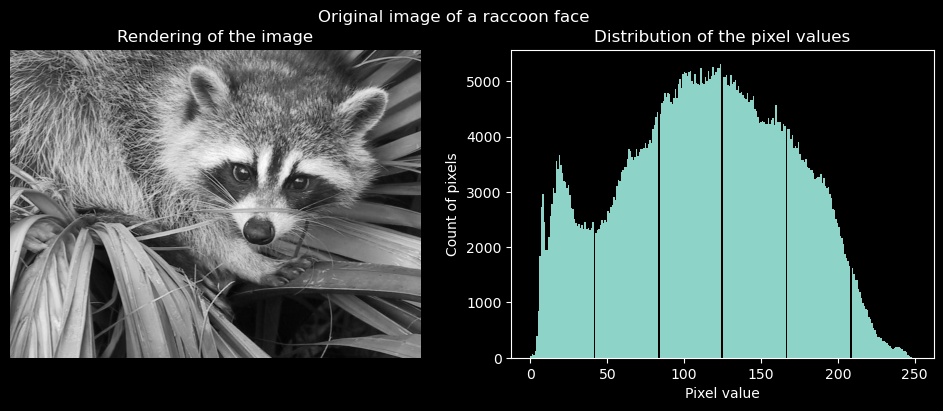

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].imshow(raccoon_face, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Rendering of the image")
ax[1].hist(raccoon_face.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Count of pixels")
ax[1].set_title("Distribution of the pixel values")
_ = fig.suptitle("Original image of a raccoon face")

In [21]:
X = raccoon_face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
X

array([[114],
       [130],
       [145],
       ...,
       [142],
       [141],
       [140]], dtype=uint8)

In [23]:
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)

values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = raccoon_face.shape

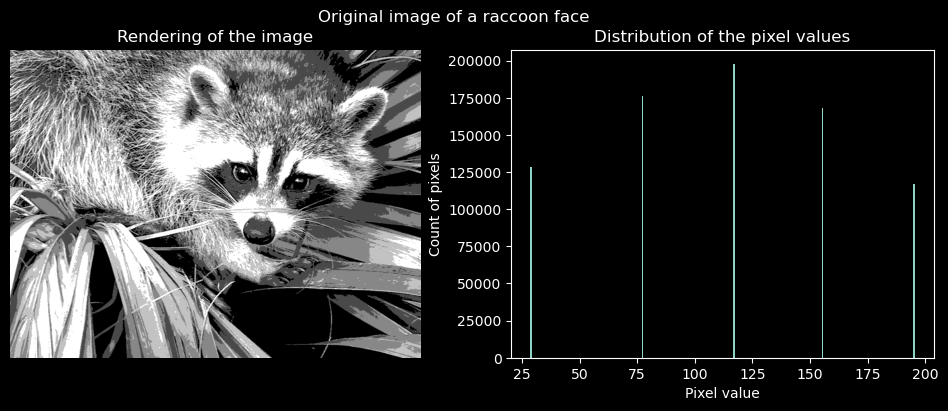

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].imshow(face_compressed, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Rendering of the image")

ax[1].hist(face_compressed.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Count of pixels")
ax[1].set_title("Distribution of the pixel values")
_ = fig.suptitle("Original image of a raccoon face")

In [27]:
print(f"The dimension of the image is {face_compressed.shape}")
print(f"The data used to encode the image is of type {face_compressed.dtype}")
print(f"The number of bytes taken in RAM is {face_compressed.nbytes}")

print(f"Compression ratio: {face_compressed.nbytes / raccoon_face.nbytes}")

The dimension of the image is (768, 1024)
The data used to encode the image is of type float64
The number of bytes taken in RAM is 6291456
The number of bytes taken in RAM is 6291456
Compression ratio: 8.0


Weirdly, our compressed image is taking **8 times more** memory than the original image due to the float64 type used to encode the image.

# further reading

this leads on to [unsupervised learning](https://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html) and [clustering](https://scikit-learn.org/stable/modules/clustering.html#) which is too much for now. 